# The Sparks Foundation Internship

## Data Science & Business Analytics

## Task 2 - Prediction using Unsupervised ML

### Intern: Jaaee Rahate

**Importing all the required libraries**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

**Loading Iris Data**

In [14]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**Finding the optiimim number of clusters for k-means classification**

In [15]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Plotting the results onto a graph**

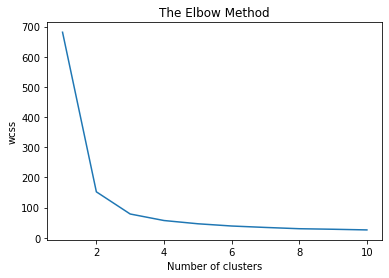

In [10]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

**Applying kmeans to the dataset/ Creating the kmeans classifier**

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

**Visualizing the clusters - On the first two columns**

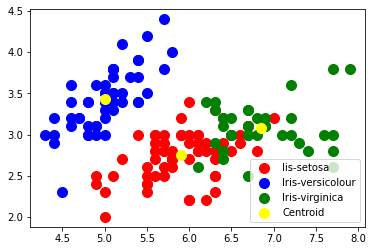

In [12]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label="Iis-setosa")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label="Iris-virginica")

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label="Centroid")

plt.legend()

This concludes the K-means Workshop.